In [103]:
from dataObject import *

In [104]:
# 初始化ds，处理数据
ds = DataSet("sample_practice.in")

Text(0, 0.5, 'create')

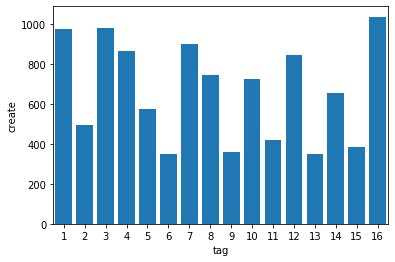

In [105]:
# 验证每个对象id只对应一个对象（即对象id不会轮转复用）
maxLen = 1
for key,objList in ds.objDict.items():
    assert(maxLen == len(objList))
    
# 绘制每个tag的总存储对象数量
taglist = [i+1 for i in range(ds.TAGNUM)]
data = ds.getNumDivideByTag()
#plt.plot(taglist, data, '.')
plt.bar(taglist, data)
plt.xlabel("tag")
plt.xlim(0.5, ds.TAGNUM+0.5)
plt.xticks(taglist)
plt.ylabel("create")

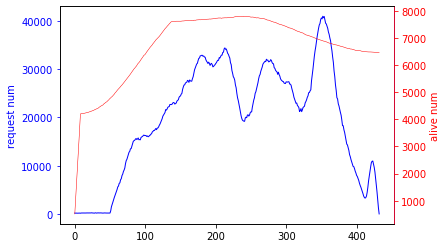

In [106]:
# 绘制每interval个时间步内的请求数量及存储对象累积存活数量

interval = 200
type = ['request', 'alive']
colors = ['blue', 'red']
lineWidth = [1, 0.5]
dim = int((ds.TOLTIME-1)/interval)+1

timelist = [i for i in range(dim)]
dataInfo:List[dataListInfo]=[None for _ in range(2)]
for tp in range(2):
    data = ds.timeBucketNum(interval, type[tp])
    dataInfo[tp] = dataListInfo(data, color=colors[tp], axisLabel=type[tp], lineWidth=lineWidth[tp])
doubleYPlot(timelist, dataInfo[0], dataInfo[1], 'time(multiplies {})'.format(interval))

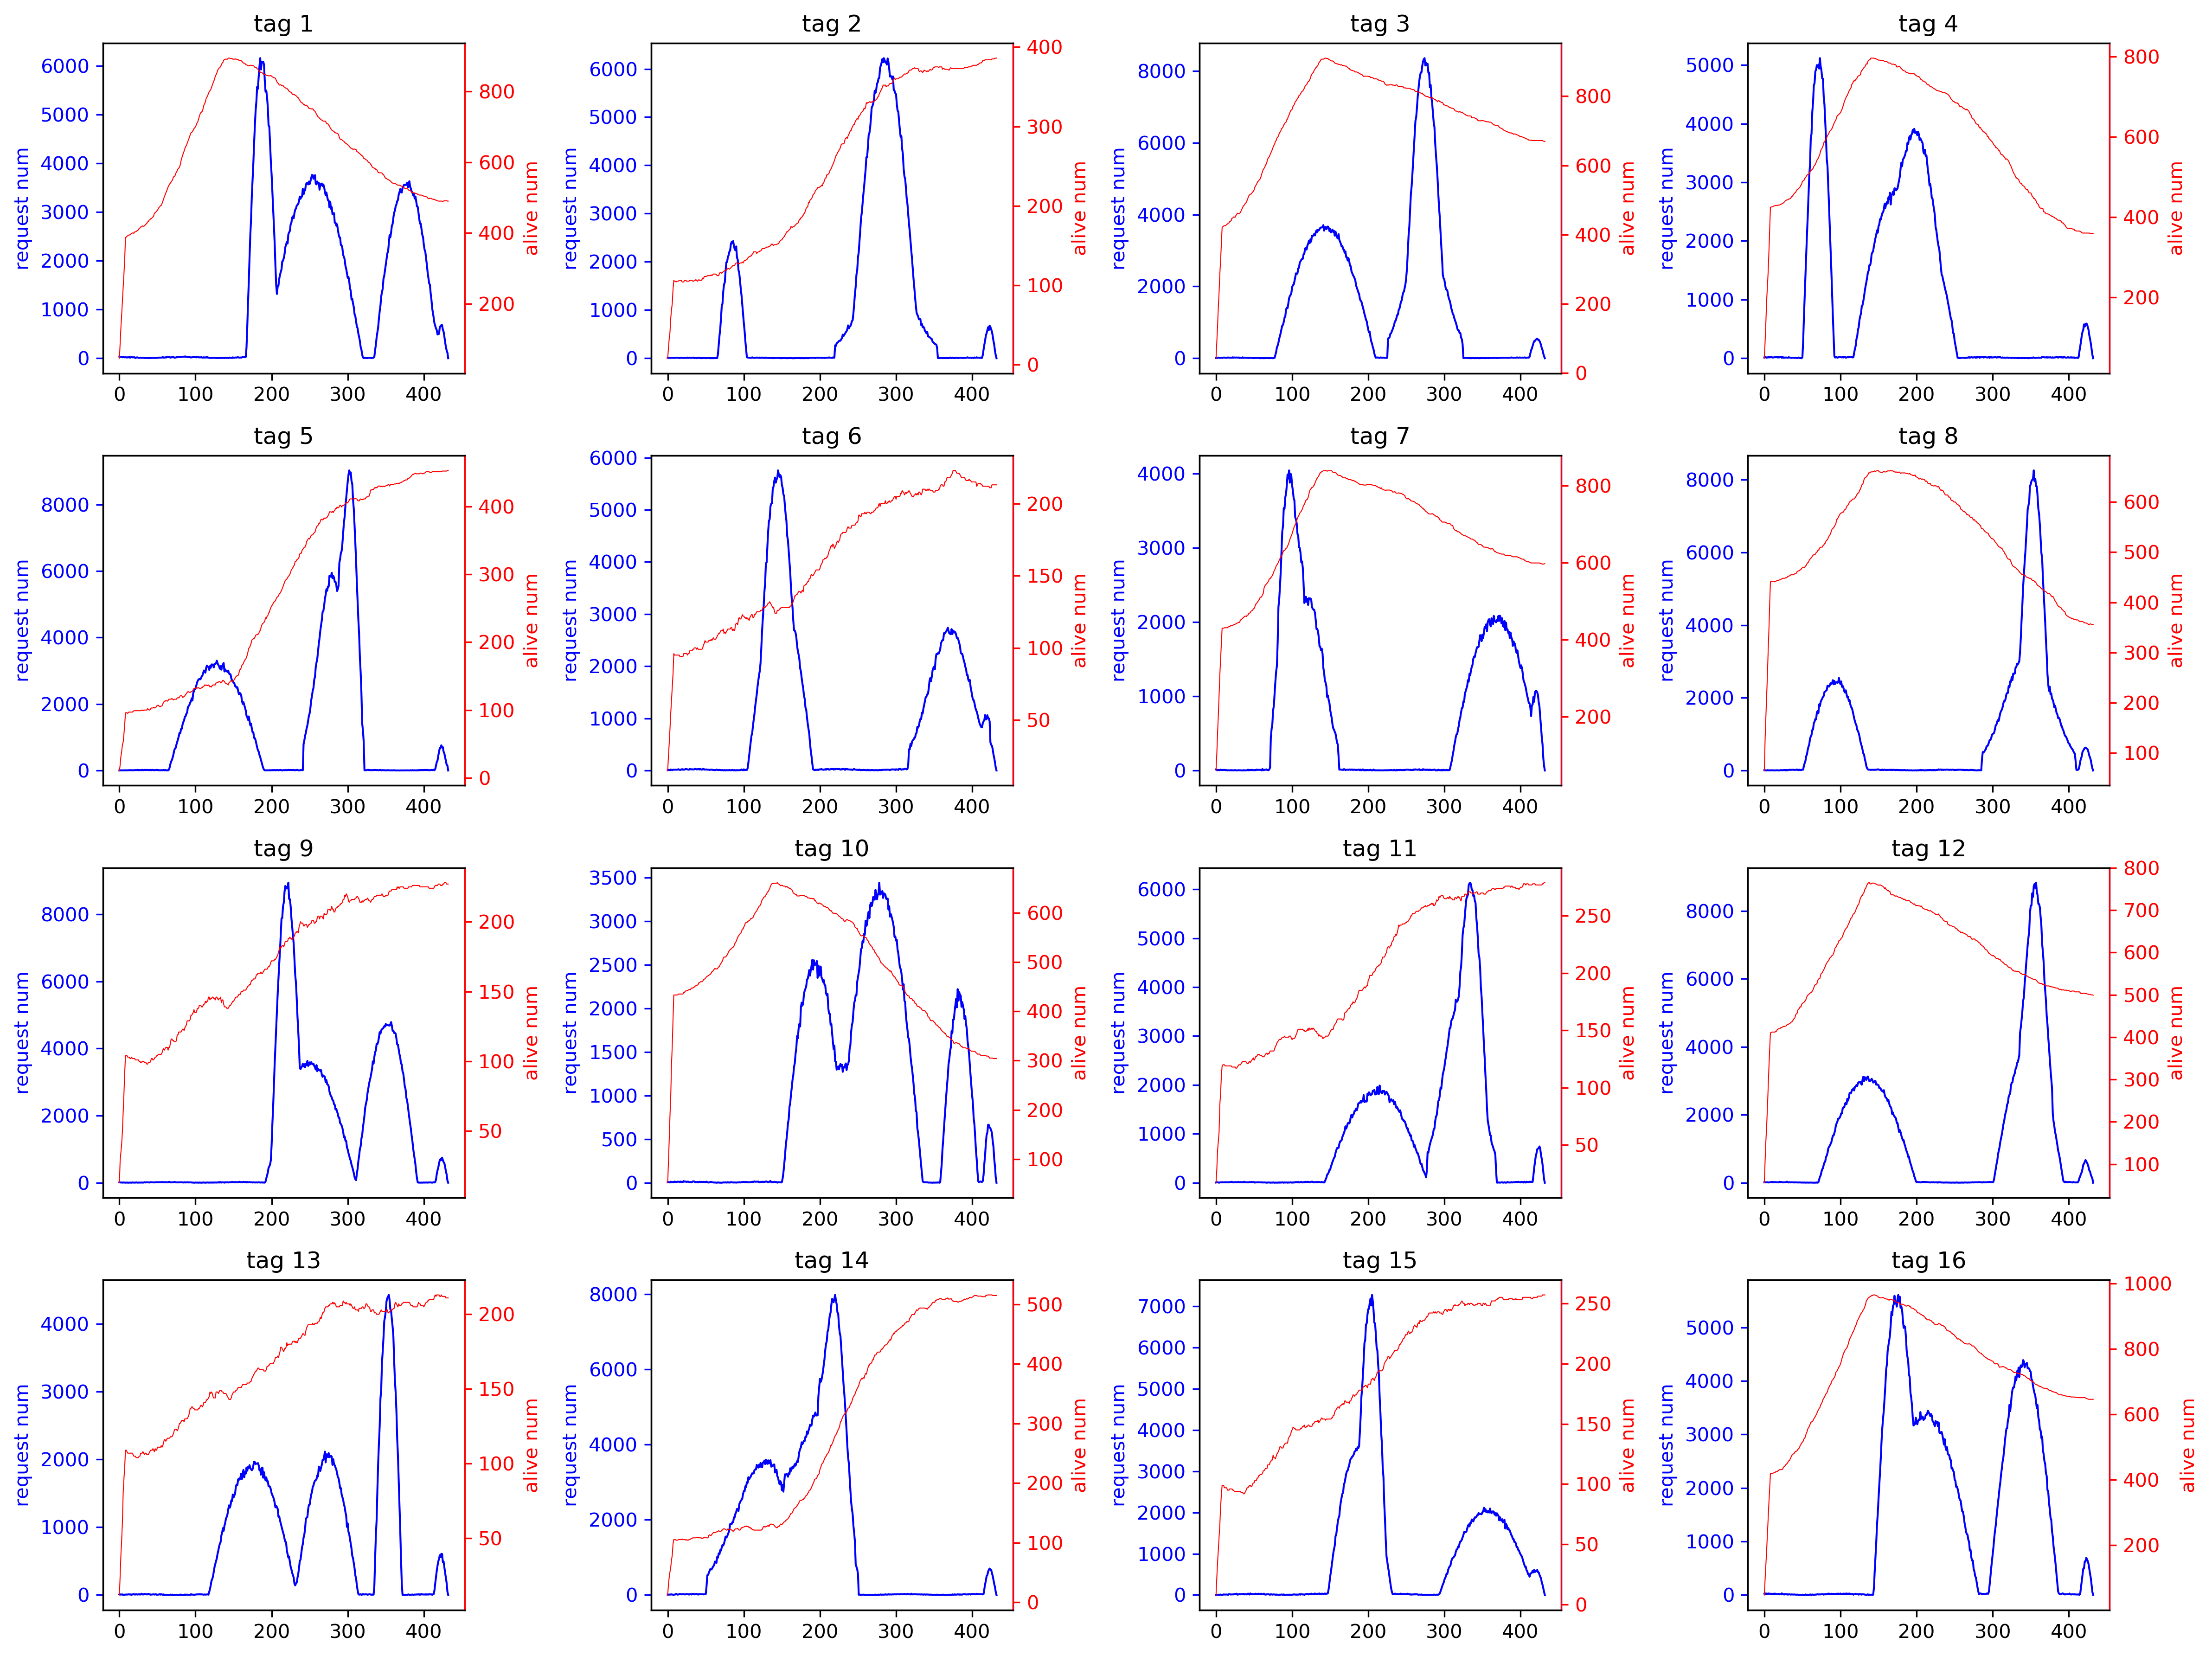

In [107]:

# 分别绘制每个tag的
plt.figure(figsize=(16, 12), dpi=300)
for i in range(ds.TAGNUM):
    axis = plt.subplot(4, 4, i+1)
    
    dataInfo = [None for _ in range(2)]
    for tp in range(2):
        data = ds.timeBucketNumByTag(interval, i+1, type[tp])
        dataInfo[tp] = dataListInfo(data, color=colors[tp], axisLabel=type[tp], lineWidth=lineWidth[tp])
    doubleYPlot(timelist, dataInfo[0], dataInfo[1], 'time(multiplies {})'.format(interval), axis)
    plt.tight_layout()
    plt.title('tag {}'.format(i+1))
    plt.plot()
# 显示图形
plt.show()

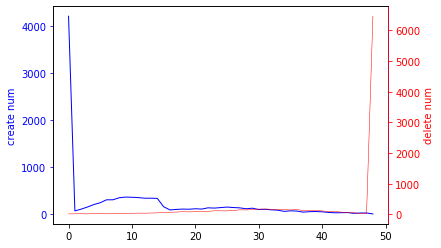

In [108]:
# 绘制每interval个时间步内的存储对象创建数量和删除数量
interval = 1800
type = ['create', 'delete']
colors = ['blue', 'red']
lineWidth = [1, 0.5]
dim = int((ds.TOLTIME-1)/interval)+1

timelist = [i for i in range(dim)]
dataInfo:List[dataListInfo]=[None for _ in range(2)]
for tp in range(2):
    data = ds.timeBucketNum(interval, type[tp])
    dataInfo[tp] = dataListInfo(data, color=colors[tp], axisLabel=type[tp], lineWidth=lineWidth[tp])
doubleYPlot(timelist, dataInfo[0], dataInfo[1], 'time(multiplies {})'.format(interval))

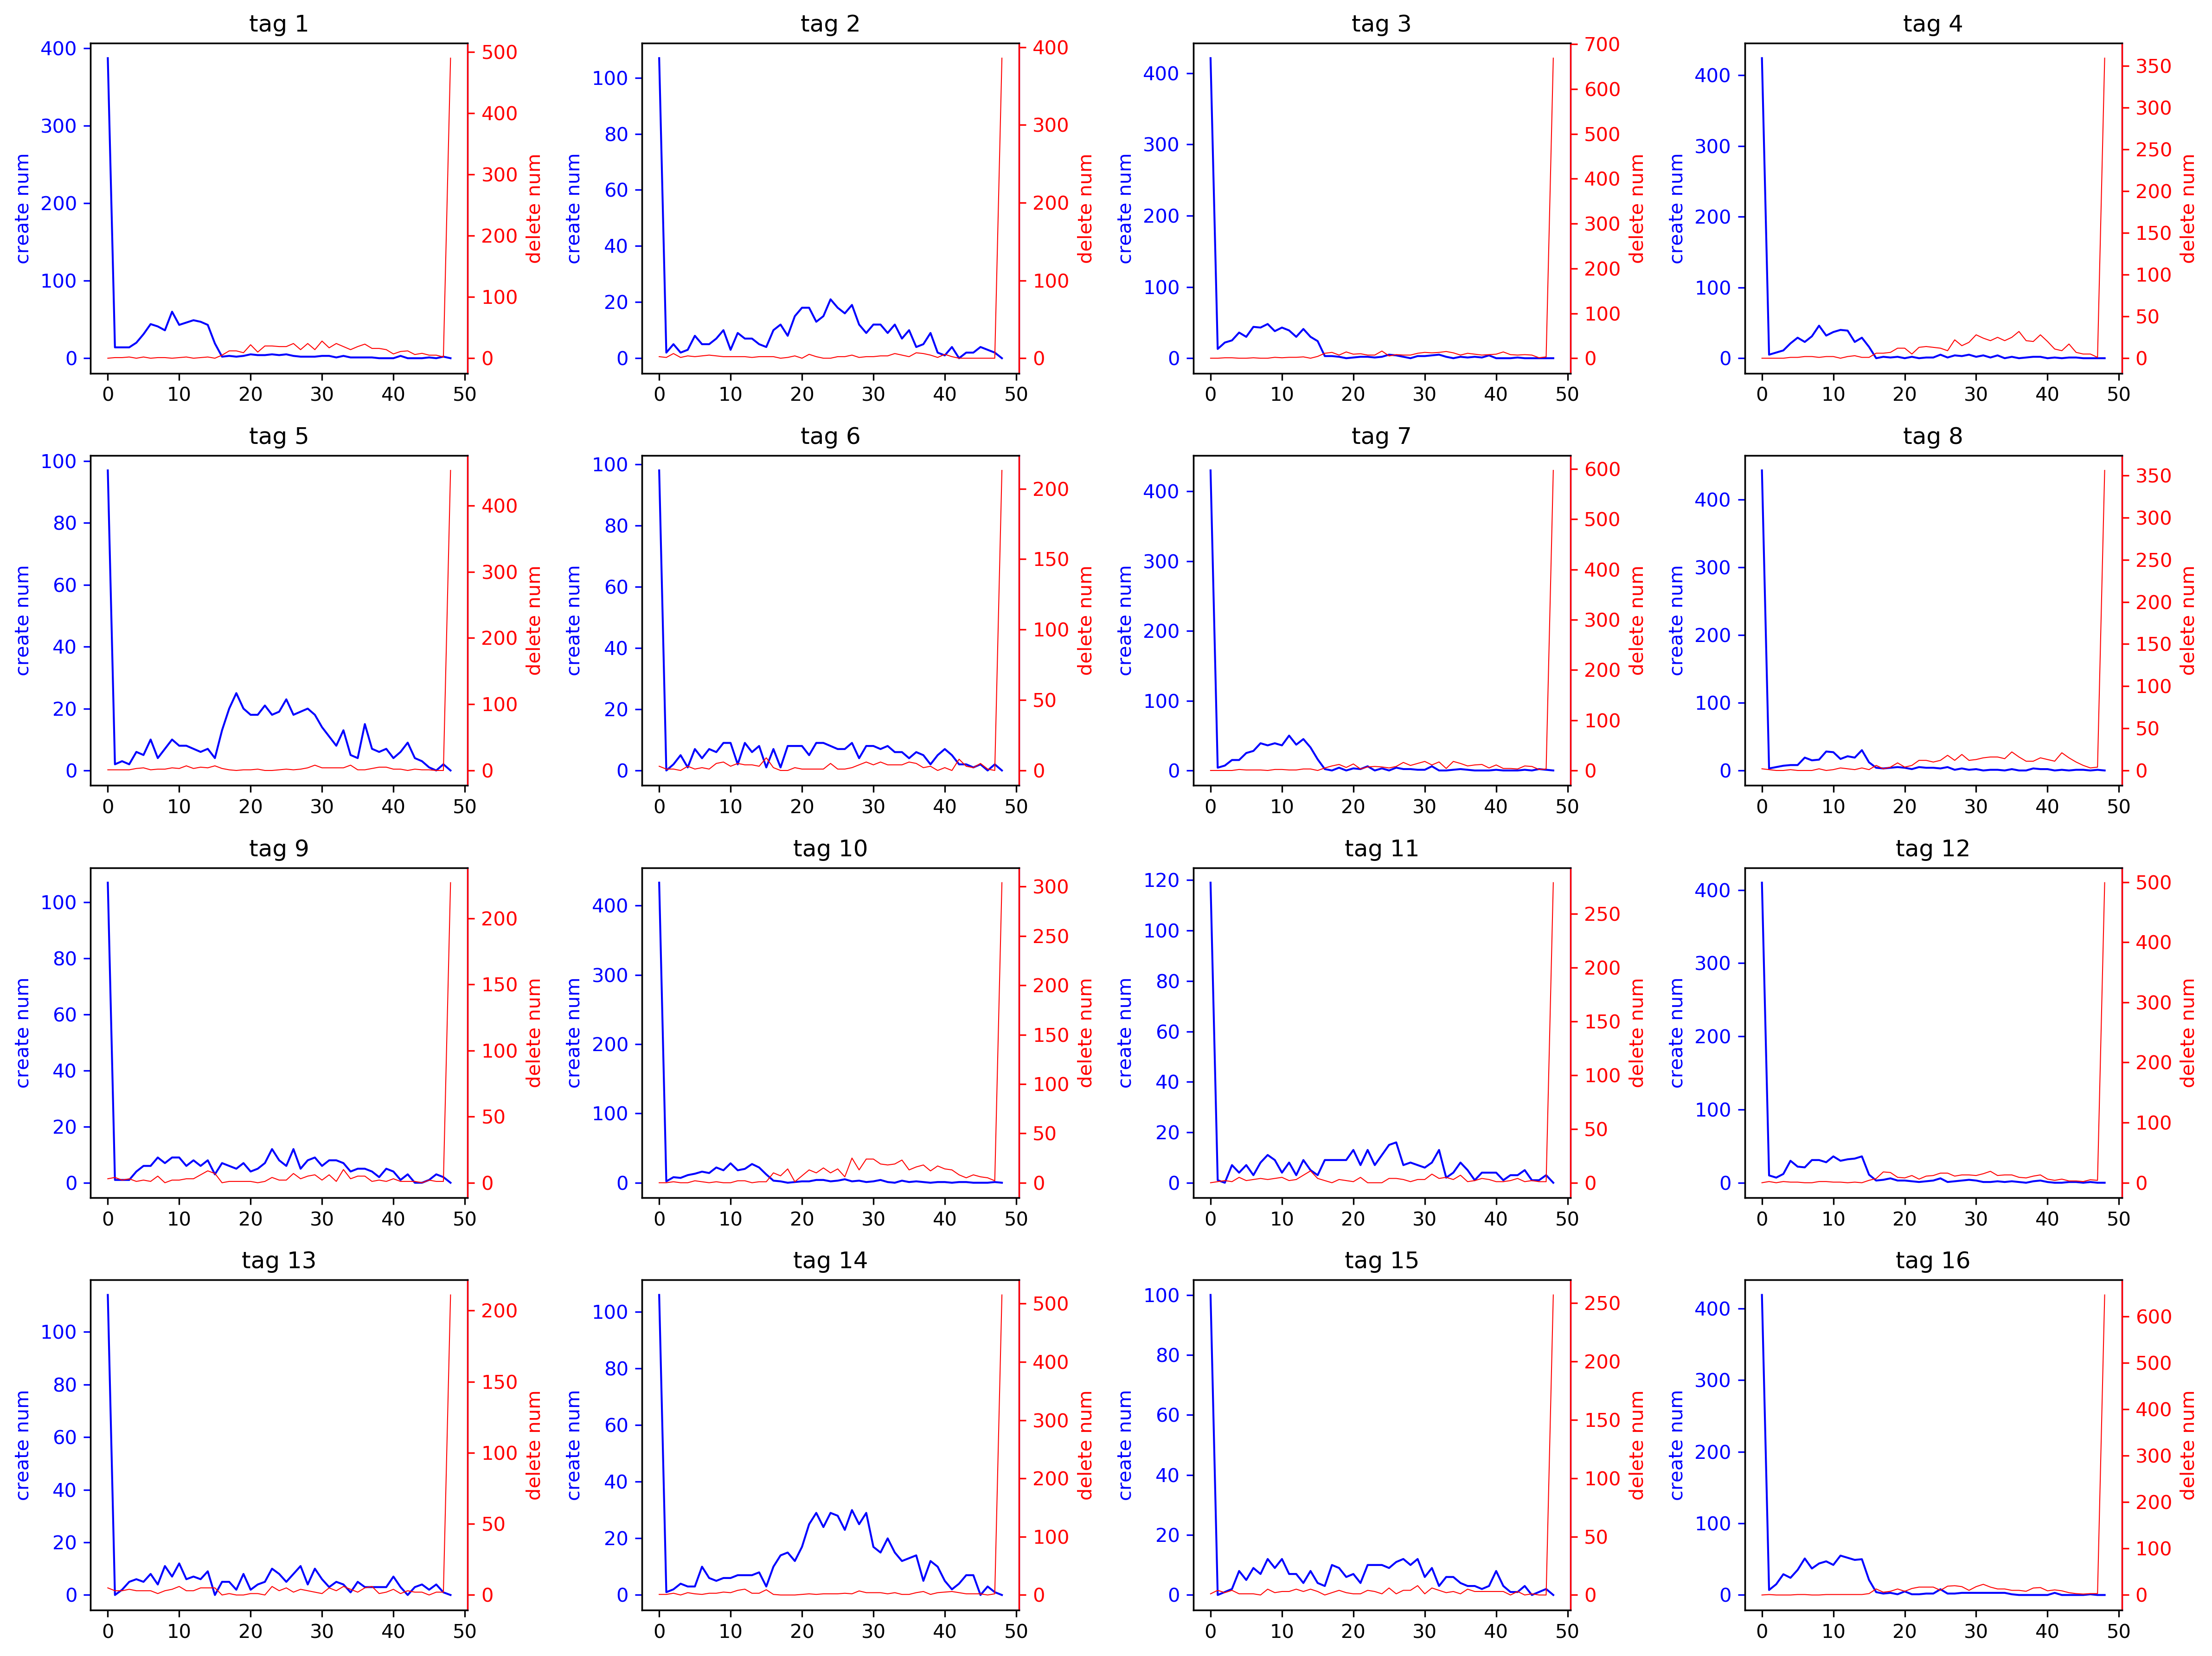

In [109]:
# 分别绘制每个tag的
plt.figure(figsize=(16, 12), dpi=300)
for i in range(ds.TAGNUM):
    axis = plt.subplot(4, 4, i+1)
    
    dataInfo = [None for _ in range(2)]
    for tp in range(2):
        data = ds.timeBucketNumByTag(interval, i+1, type[tp], 1)
        dataInfo[tp] = dataListInfo(data, color=colors[tp], axisLabel=type[tp], lineWidth=lineWidth[tp])
    doubleYPlot(timelist, dataInfo[0], dataInfo[1], 'time(multiplies {})'.format(interval), axis)
    plt.tight_layout()
    plt.title('tag {}'.format(i+1))
    plt.plot()
# 显示图形
plt.show()